## Assignment 2

### Highlights
*On April 15, 1912 during her maiden voyage from Southampton to New York City, Titanic sank after it collided with an iceberg. There were approximately 2224 passengers and crew members on board but it is estimated that 1514 of them died. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for everyone on board.*

 *Moreover "The water temperature in the area where Titanic sank, which was well below normal, also contributed to the rapid death of many passengers during the sinking. Water temperature readings taken around the time of the accident were reported to be 28 °F (−2 °C). Typical water temperatures were normally in the mid-40 °F range during mid-April.[216] The coldness of the water was a critical factor, often causing death within minutes for many of those in the water."* (https://www.washingtonpost.com/blogs/capital-weather-gang/post/the-weather-during-the-titanic-disaster-looking-back-100-years/2012/04/11/gIQAAv6SAT_blog.html?utm_term=.cb4f9e0673c7)

 In this assignment we will analyze the open dataset with real data on the passengers aboard the Titanic. Even though luck could have been a part of the reason for survival, some group of people were more likely to survive than others.

### Data Dictionary

<li> "Survived": 0 = No, 1 = Yes 
<li> "Pclass": Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
<li> "Sex": female, male
<li> "Age": Age in years 
<li> "SibSp": # of siblings / spouses aboard the Titanic 
<li> "Parch": # of parents / children aboard the Titanic 
<li> "Ticket": Ticket number 
<li> "Fare": Passenger fare 
<li> "Cabin": Cabin number 
<li> "Embarked": Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

<ul> Pclass: A proxy for socio-economic status (SES)
<li> 1st = Upper
<li> 2nd = Middle
<li> 3rd = Lower
</ul>
<ul> Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5 </ul>
<ul> SibSp: The dataset defines family relations in this way...
<li> Sibling = brother, sister, stepbrother, stepsister
<li> Spouse = husband, wife (mistresses and fiancés were ignored)
</ul>
<ul> Parch: The dataset defines family relations in this way...
<li> Parent = mother, father
<li> Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
</ul>

In [1]:
import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data loading

In [2]:
#load dataset as DataFrame
train_df=pd.read_csv('train.csv',sep=',')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data description

In [25]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Badt, Mr. Mohamed",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


<li> Total number of passengers in the training dataset is 891. Actual number of passengers on Titanic was 2224. Therefore, the training dataset (sample) represents 40% of the actual population. 
<li> Fares varied significantly from paying nothing to as high as $512.

#### Handling missing value
The count variable shows that (891-714)=177 values are missing in the Age column.
<li> The median is a robust measure because it is not strongly affected by a few outliers so instead of replacing the missing values with the mean, I am going to replace the missing values with the median age.

### Data Cleaning 

In [31]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
df=train_df.drop(['PassengerId','Name', 'Cabin', 'Ticket','Embarked'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


I've decided to drop the columns indicated above. 
**PassengerId** and **Name** do not provide important data in this specific analysis because it does not affect the results. (ex. Altering the passenger's name won't affect the result of the analysis) Similarly, the port where passengers **Embarked** did not seem to strongly affect the result of the analysis as it's just a location and passengers are divided based on their passenger class not where they boarded from. For **Cabin** and **Ticket**, there were a lot of missing values as well as duplicates for Cabin (because some passengers shared a cabin) and similarly there were duplicates (unique =681 out of count=891) for Ticket column. I decided that Passenger Class (as well as **Fare**) itself could be an indication of wealth (generally, higher the fare, the more wealthy he or she is) and provide important insights in the data analysis. 

In [33]:
#How may passengers survived(Survived=1)?
data1=df['Survived'].value_counts()
data1

0    549
1    342
Name: Survived, dtype: int64

In our dataset around 342/891 = 38% passengers survived. This is quite similar to the actual survival rate,((2224-1514)/2224) at 32%. We can say that the dataset may be a good representative of the total population of the actual incident.

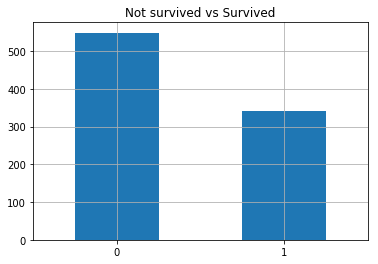

In [34]:
#Let's visualize the result
fig, axes = plt.subplots(1,1)
data1.plot.bar(title='Not survived vs Survived', rot='horizontal', grid = True)

In [10]:
#Which Passenger class had the most passengers?
data2 = df['Pclass'].value_counts().sort_index()
data2

1    216
2    184
3    491
Name: Pclass, dtype: int64

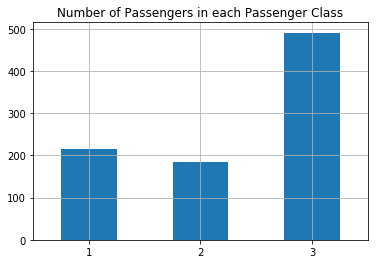

In [11]:
#Let's visualize 
fig, axes = plt.subplots(1,1)
data2.plot.bar(title='Number of Passengers in each Passenger Class',rot='horizontal',grid=True)

We can see that Passenger Class 3 had the most passengers on board. Passenger class 1 represents the most wealthiest class on board who get to enjoy the luxury while traveling, whereas passenger class 3 are economy class passengers who mostly were not wealthy. 

In [35]:
# Total gender ratio on board?
data3 = df['Sex'].value_counts()
data3

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#Let's plot the result
fig, axes = plt.subplots(1,1)
data3.plot.bar(title='Gender ratio on board',rot='horizontal',grid=True)

There were more male passengers on board. 65% male (top=male, freq=577/count=891).

In [37]:
#Number of passengers in each AgeGroup: minAge=0.42 (<1year) , maxAge=80
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
df['AgeGroup']=pd.cut(df['Age'], bins)
data4=pd.value_counts(df['AgeGroup']).sort_index()
data4

(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: AgeGroup, dtype: int64

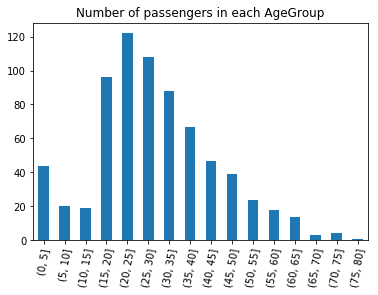

In [38]:
data4.plot.bar(title='Number of passengers in each AgeGroup', rot=80)

Most passengers on board were in the 15-35 year age range and quite a number of children on board. 

### Data Analyzing

<li> Which gender (Female vs. Male) was more likely to survive? 
<li> Which agegroup was more likely to have survived?
<li> Which class passengers were more likely to have survived?


In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,"(20, 25]"
1,1,1,female,38.0,1,0,71.2833,C,"(35, 40]"
2,1,3,female,26.0,0,0,7.9250,S,"(25, 30]"
3,1,1,female,35.0,1,0,53.1000,S,"(30, 35]"
4,0,3,male,35.0,0,0,8.0500,S,"(30, 35]"


In [16]:
# Over all, which gender (Female vs. Male) was more likely to have survived?
survived_sex=df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)
survived_sex

,Survived
Sex,
female,0.742038
male,0.188908


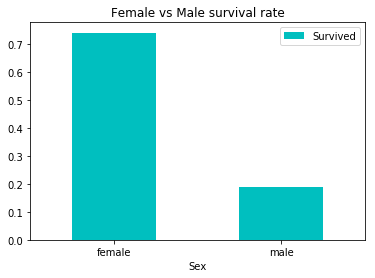

In [17]:
survived_sex.plot.bar(title='Female vs Male survival rate', rot='horizontal', color='c')

We can observe from the diagram that female passengers were more likely to have survived (74%>19%)

In [40]:
#Passengers from which class were more likely to have survived? 
survived_class=df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
survived_class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


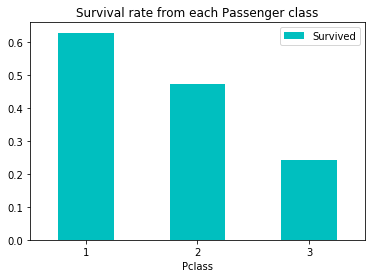

In [15]:
survived_class.plot.bar(title='Survival rate from each Passenger class', rot='horizontal', color='c')

Overall, passengers from first class were more likey to have survived. I believe that this is also due to social status, wealthier people usually having more resources and due to the structure of titanic (lower class cabins were located on the bottom, it's harder for them to survive). 

In [42]:
#Let's take a look at female vs. male survival ratio in each Passenger Class
class_sex_group = df.groupby(['Pclass','Sex']).mean()
class_sex_group

Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                        
1      female  0.968085  34.611765  0.553191  0.457447  106.125798
       male    0.368852  41.281386  0.311475  0.278689   67.226127
2      female  0.921053  28.722973  0.486842  0.605263   21.970121
       male    0.157407  30.740707  0.342593  0.222222   19.741782
3      female  0.500000  21.750000  0.895833  0.798611   16.118810
       male    0.135447  26.507589  0.498559  0.224784   12.661633

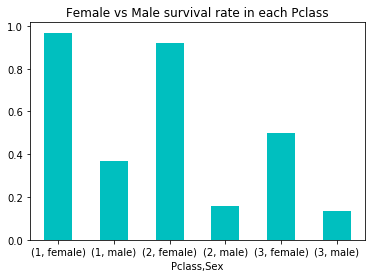

In [43]:
class_sex_group['Survived'].plot.bar(title='Female vs Male survival rate in each Pclass', rot='horizontal', color='c')

In [45]:
survived_AgeGroup=df[['AgeGroup','Survived']].groupby(['AgeGroup']).mean().sort_values(by='Survived',ascending=False)
survived_AgeGroup.sort_index()

,Survived
AgeGroup,
"(0, 5]",0.704545
"(5, 10]",0.350000
"(10, 15]",0.578947
"(15, 20]",0.343750
"(20, 25]",0.344262
"(25, 30]",0.388889
"(30, 35]",0.465909
"(35, 40]",0.417910
"(40, 45]",0.361702


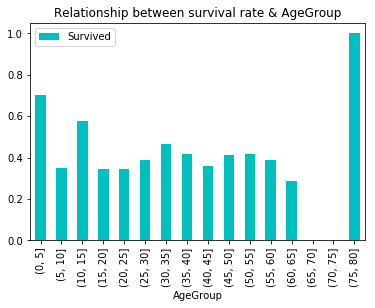

In [46]:
survived_AgeGroup.sort_index().plot.bar(title='Relationship between survival rate & AgeGroup', 
                                      color='c')

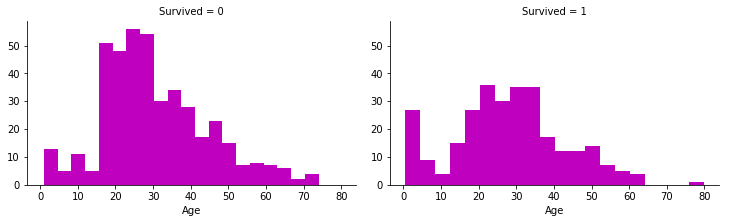

In [48]:
#Let's compare the "not survived" vs "survived" data across age groups.
Age = sns.FacetGrid(df, col='Survived',size=3.2, aspect=1.6)
Age.map(plt.hist, 'Age', bins=20, color='m')

After observing two different plots, we can see that while most passengers on board were in the 15-35 year age range, large number of passengers in that age range did not survive. On the other hand, children (age<=5) had high survival rate. Oldest passengers (Age = 80) survived!

In [49]:
# What is the relationship between number of siblings & spouses on board and survival rate?

survived_SibSp=df[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)
survived_SibSp.sort_index()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


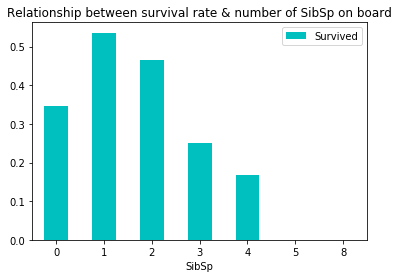

In [50]:
survived_SibSp.sort_index().plot.bar(title='Relationship between survival rate & number of SibSp on board',
                                     rot='horizontal',color='c')

It is obvious that the more Siblings or Spouses are on board, the survival rate decreases as the number of spaces on lifeboat were limited, and to escape and survive such a disaster, is hard when you have more people with you and some people have to sacrifice to save the other family member. But there seems to be no direct correlation with the number of siblings & spouses and survival rate. 

In [51]:
#What is the relationship between number of Parent&Children on board and survival rate?

survived_Parch=df[['Parch','Survived']].groupby(['Parch'],).mean().sort_values(by='Survived', ascending=False)
survived_Parch.sort_index()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


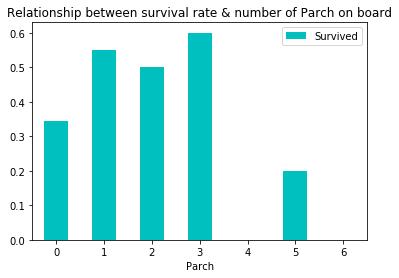

In [52]:
survived_Parch.sort_index().plot.bar(title='Relationship between survival rate & number of Parch on board', 
                                     rot='horizontal', color='c')

There seems to be no direct relationship between the number of children and parents on board and the survival rate. Surprisingly it is observed that upto Parch=3, survival rate is decently higher than the mean survival rate(38%.  I believe that this is due to parents (married couple) trying to sacrifice their lives to save their children or their elder parents. 

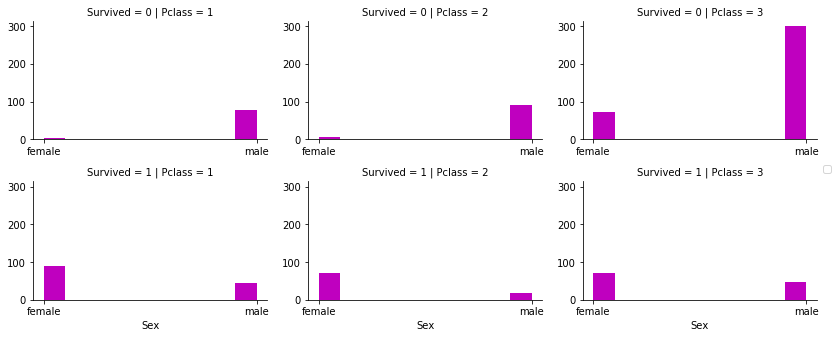

In [54]:
P_Sur_Sex = sns.FacetGrid(df, col='Pclass', row='Survived',size=2.4, aspect=1.6)
P_Sur_Sex.map(plt.hist, 'Sex', color='m')
P_Sur_Sex.add_legend();

** Conclusion** 

Through conducting data analysis on which group were more likely to have survived the titanic shipwreck, these were the conclusions that I found. 

<li> Female passengers were more likely to have survived than male passengers.
<li> Passengers on Pclass were more likely to have survived.
<li> An exception is that although most female passengers are likely to have survived, most female passengers in third class (Pclass=3) were exposed to death. 
<li> Similarly, Men from the First Class died at a higher rate than women from the Third Class, which supports the conclusion that female passengers were still more likely to have survived. 
<li> Children (Age<5 years) were more likely to have survived that those who were aged 15-35 years while majority of the passengers were also aged in that group.
<li> The number of Parent & children as well as number of siblings and spouses did not have a direct correlation with the survival rate. 

Although these were the findings through analyzing the training data set, it disregards a lot of factors such as, it's not a completely accurate data set, water temperature at the time of shipwreck, structure of titanic, the part of titanic that hit the iceberg (some people probably weren't aware of titanic sinking until way later, some people probably did not survive because they were unable to escape due to being trapped by water flowing in and etc.) and how people were given spaces on the lifeboat and etc. However, It was very interesting to be given the opportunity to analyze real life data and I hope to acquire more skills and be able to conduct more complicated analysis later on.